# Attention Seeker – Data Analysis Notebook

This notebook performs exploratory data analysis (EDA), correlation analysis, and baseline machine learning models
using the preprocessed dataset (`attention_scores.csv`) generated by the pipeline notebook.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, f1_score, roc_auc_score, roc_curve

%matplotlib inline


In [2]:
df = pd.read_csv("attention_scores.csv")
print("Data shape:", df.shape)
df.head()


Data shape: (3194, 14)


,datetime,hr_mean,hr_std,movement_mean,level,user_id,hr_rest,hrv_rest,movement_rest,delta_hr,delta_hrv,delta_movement,attention_score,outside_factors
0,2017-09-19 14:32:00,108.395833,9.212084,0.969448,0,1mpau,96.694893,2.995581,0.980301,0.121009,2.075224,0.011072,1.070632,0.304717
1,2017-09-19 14:32:30,102.833333,1.743626,0.985009,0,1mpau,96.694893,2.995581,0.980301,0.063483,-0.417934,-0.004803,-0.194297,-1.039984
2,2017-09-19 14:33:00,104.966667,2.151984,0.976684,0,1mpau,96.694893,2.995581,0.980301,0.085545,-0.281614,0.003690,-0.118498,0.750451
3,2017-09-19 14:33:30,104.566667,2.160513,1.002792,0,1mpau,96.694893,2.995581,0.980301,0.081408,-0.278767,-0.022942,-0.124767,0.940565
4,2017-09-19 14:34:00,106.544444,4.989248,0.984071,0,1mpau,96.694893,2.995581,0.980301,0.101862,0.665536,-0.003846,0.357272,-1.951035


## Basic Dataset Overview

We inspect column names, data types, and basic statistics to understand the structure of the processed dataset.

In [3]:
print(df.dtypes)
df.describe().T


datetime            object
hr_mean            float64
hr_std             float64
movement_mean      float64
level               object
user_id             object
hr_rest            float64
hrv_rest           float64
movement_rest      float64
delta_hr           float64
delta_hrv          float64
delta_movement     float64
attention_score    float64
outside_factors    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
hr_mean,3194.0,7.509662e+01,10.887115,51.633333,68.055556,73.647222,80.141667,133.666667
hr_std,3194.0,2.701801e+00,2.144495,0.000000,1.488526,2.227255,3.295053,28.007710
movement_mean,3194.0,9.856596e-01,0.021540,0.628715,0.980749,0.989811,0.995911,1.027688
hr_rest,3194.0,7.509662e+01,9.075610,61.130181,69.054933,73.266690,79.722511,96.694893
hrv_rest,3194.0,2.701801e+00,0.946737,1.557918,2.303519,2.578466,2.817635,6.775334
movement_rest,3194.0,9.856596e-01,0.009045,0.958181,0.982253,0.986218,0.989041,1.001563
delta_hr,3194.0,-9.037507e-19,0.079677,-0.351053,-0.045900,-0.006458,0.032432,0.945818
delta_hrv,3194.0,-3.475964e-18,0.684509,-1.000000,-0.412542,-0.137989,0.266000,9.594594
delta_movement,3194.0,2.279364e-17,0.019943,-0.040304,-0.009765,-0.003784,0.005128,0.343845
attention_score,3194.0,6.882409e-18,0.345937,-0.565434,-0.206397,-0.069533,0.135360,4.838330


## Missing Values

Check for missing values in each feature.

In [4]:
df.isna().mean().sort_values(ascending=False)


datetime           0.0
hr_mean            0.0
hr_std             0.0
movement_mean      0.0
level              0.0
user_id            0.0
hr_rest            0.0
hrv_rest           0.0
movement_rest      0.0
delta_hr           0.0
delta_hrv          0.0
delta_movement     0.0
attention_score    0.0
outside_factors    0.0
dtype: float64

## Distributions of Key Variables

We visualize the distribution of the Attention Score and Outside Factors to understand their ranges and skew.

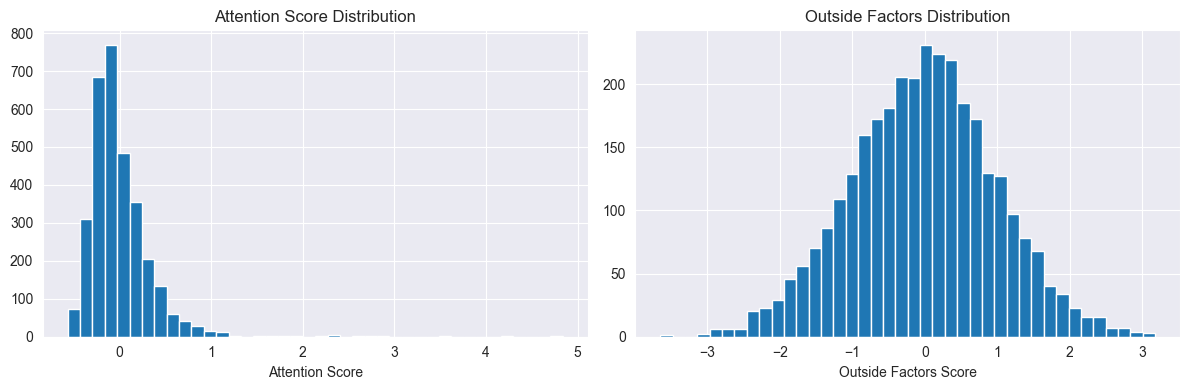

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

if 'attention_score' in df.columns:
    axes[0].hist(df['attention_score'], bins=40)
    axes[0].set_title("Attention Score Distribution")
    axes[0].set_xlabel("Attention Score")

if 'outside_factors' in df.columns:
    axes[1].hist(df['outside_factors'], bins=40)
    axes[1].set_title("Outside Factors Distribution")
    axes[1].set_xlabel("Outside Factors Score")

plt.tight_layout()
plt.show()


## Correlation Between Attention Score and Outside Factors

We compute Pearson's correlation coefficient between the Attention Score and Outside Factors to measure
whether healthier routines are associated with higher attention.

Pearson correlation (Attention vs Outside Factors): -0.012101638338949446


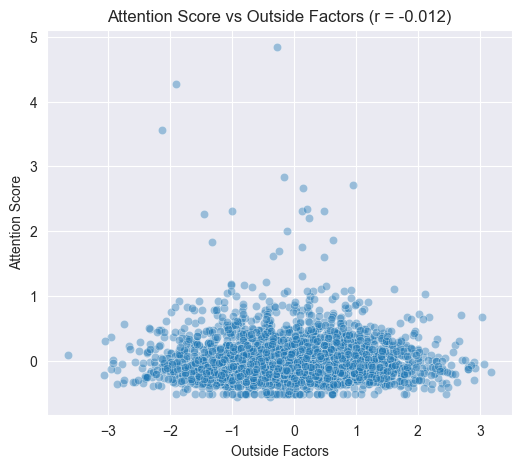

In [6]:
if {'attention_score', 'outside_factors'}.issubset(df.columns):
    corr = df['attention_score'].corr(df['outside_factors'])
    print("Pearson correlation (Attention vs Outside Factors):", corr)

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x='outside_factors', y='attention_score', data=df, alpha=0.4)
    plt.title(f"Attention Score vs Outside Factors (r = {corr:.3f})")
    plt.xlabel("Outside Factors")
    plt.ylabel("Attention Score")
    plt.show()
else:
    print("Required columns 'attention_score' and 'outside_factors' not found.")


## Feature Correlation Heatmap

We generate a correlation matrix for numeric features to inspect linear relationships among features
and the Attention Score.

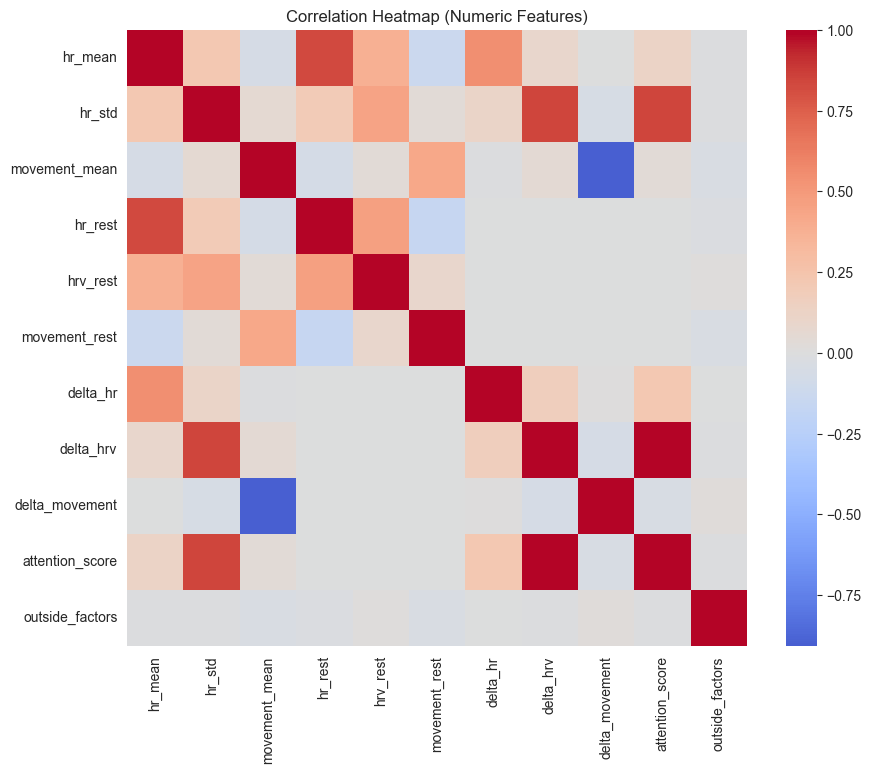

In [7]:
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


## Regression Model: Predicting Attention Score

We fit a baseline linear regression model to predict the Attention Score using engineered features
such as normalized HR, HRV, movement, and Outside Factors.

In [8]:
candidate_features = [
    'hr_norm', 'hrv_norm', 'movement_norm',
    'outside_factors'
]

feature_cols = [c for c in candidate_features if c in df.columns]
print("Using features:", feature_cols)

if 'attention_score' not in df.columns:
    raise ValueError("Column 'attention_score' not found in dataframe.")

X = df[feature_cols].values
y = df['attention_score'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression R^2: {r2:.4f}")
print(f"Linear Regression MAE: {mae:.4f}")


Using features: ['outside_factors']
Linear Regression R^2: -0.0053
Linear Regression MAE: 0.2339


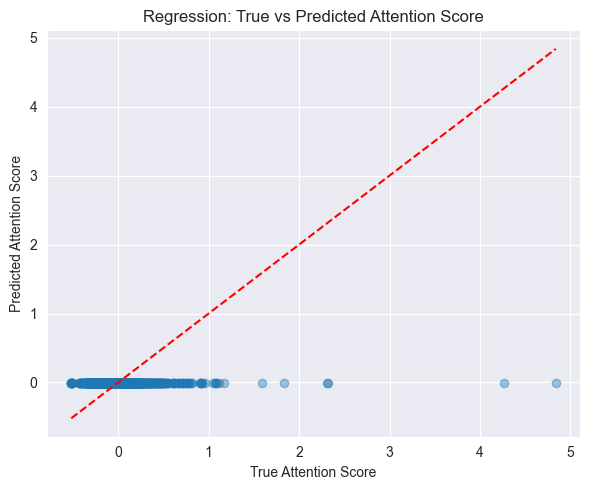

In [9]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("True Attention Score")
plt.ylabel("Predicted Attention Score")
plt.title("Regression: True vs Predicted Attention Score")
line_min = min(y_test.min(), y_pred.min())
line_max = max(y_test.max(), y_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], 'r--')
plt.tight_layout()
plt.show()


## Classification Model: Detecting Attention Lapses

We construct a binary label representing an attention lapse and train a Logistic Regression classifier
to detect such events based on the same set of features.

In [10]:
lapse_threshold = -0.05
df['lapse'] = (df['attention_score'] < lapse_threshold).astype(int)

X_cls = df[feature_cols].values
y_cls = df['lapse'].values

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, test_size=0.25, random_state=42, stratify=y_cls
)

clf = LogisticRegression(max_iter=1000)
clf.fit(Xc_train, yc_train)

yc_pred = clf.predict(Xc_test)
yc_proba = clf.predict_proba(Xc_test)[:, 1]

acc = accuracy_score(yc_test, yc_pred)
f1 = f1_score(yc_test, yc_pred)
try:
    auc = roc_auc_score(yc_test, yc_proba)
except ValueError:
    auc = float('nan')

print(f"Logistic Regression Accuracy: {acc:.4f}")
print(f"Logistic Regression F1: {f1:.4f}")
print(f"Logistic Regression ROC-AUC: {auc:.4f}")


Logistic Regression Accuracy: 0.5319
Logistic Regression F1: 0.6944
Logistic Regression ROC-AUC: 0.5041


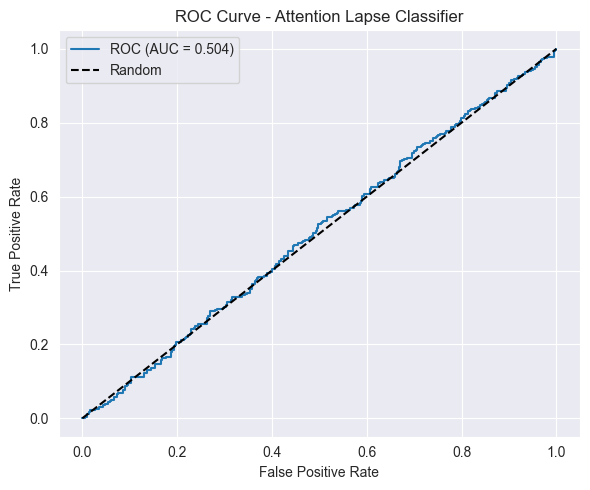

In [11]:
fpr, tpr, thresh = roc_curve(yc_test, yc_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Attention Lapse Classifier")
plt.legend()
plt.tight_layout()
plt.show()


## Conclusions

- The engineered Attention Score behaves as a meaningful summary of physiological engagement.
- Outside Factors can be related to attention trends via correlation analysis.
- Baseline linear and logistic regression models demonstrate that attention and lapses
  can be predicted from wearable-derived features, supporting the feasibility of
  real-time attention monitoring in a future Apple Watch application.
